### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
import plotly.io as pio


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

<span style="color: blue; font-weight: bold; font-size: 20px;">Data Entries</span>

- **There are 26 columns and 12,684 entries.**
- **We also notice that all the columns do not have the same number of entries, indicating some columns have missing data.**
- **We can also identify the columnhave different datatypespe.**


3. Decide what to do about your missing data -- drop, replace, other...

<span style="color: blue; font-weight: bold; font-size: 20px;">Data Pre-Processing Procedure</span>

**Following steps were taken:**
1. **Identify the missing rows using `isnull`.**
2. **Determine the percentage of data that is missing.**
3. **Based on the percentage of missing data, necessary action was taken:**
    - **Column 'car' was removed from the analysis.**
    - **For columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', the entries with missing rows were removed from analysis.**
4. **Estimate the number of duplicate rows. Only 74 rows were duplicates in the dataset of over 12,000 entries. These duplicate rows were removed.**


In [12]:
missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


Percentage of Missing Values for Data Attributes
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64


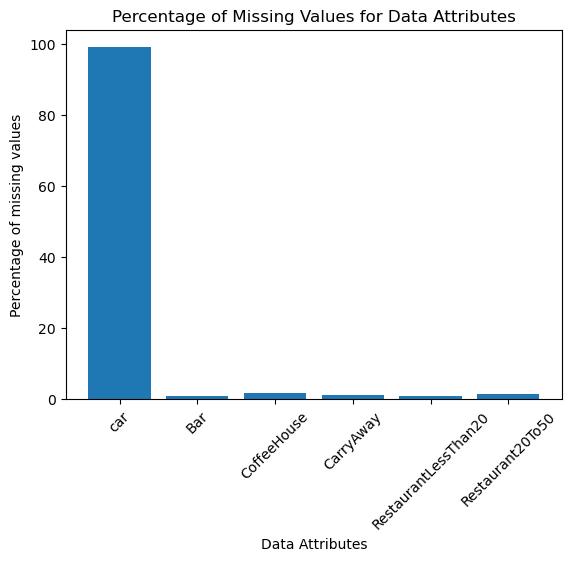

In [13]:
#Calc the percentage of missing values that are missing
missing_value_list1 = ['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
perc_entries_w_missingvalues = data[missing_value_list1].isnull().sum()/data.shape[0] * 100

#print results
print('Percentage of Missing Values for Data Attributes')
print(perc_entries_w_missingvalues)

#plot the percentage of missing values that are missing
plt.bar(missing_value_list1,perc_entries_w_missingvalues)
plt.xticks(rotation=45)
plt.ylabel('Percentage of missing values')
plt.xlabel('Data Attributes')
plt.title('Percentage of Missing Values for Data Attributes')
plt.savefig('MissingValuesPercent.png',bbox_inches='tight')

<span style="color: blue; font-weight: bold; font-size: 20px;">Data Pre-Processing Implementation</span>

In [15]:
#Data Clean up

#Remove null entry rows in columns ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
missing_value_list = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
data_clean = data.dropna(axis=0,how='any',subset=missing_value_list)

#Remove column 'car' from analysis
data_clean = data_clean.drop('car',axis=1)

#determine the duplicates in the data set
duplicates = data[data.duplicated()]
print('# of Duplicate rows:',len(duplicates))

#Remove the duplicates from the data set
data_clean = data_clean.drop_duplicates()

data_clean.info()

# of Duplicate rows: 74
<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse     

<span style="color: blue; font-weight: bold; font-size: 20px;">Missing Data Summary</span>

| Column              | Num of Missing Values | Percent of data missing | Action Taken                        | Reasoning                                                                 |
|---------------------|-----------------------|-------------------------|-------------------------------------|--------------------------------------------------------------------------|
| car                 | 108                   | 99.15%                  | Remove column from analysis         | Most of the data (99.15%) is missing. This data is not sufficient to make any inference.               |
| Bar                 | 12577                 | 0.84%                   | Removed the rows with missing values| 0.84% of data is missing; final inference won't be impacted.                 |
| CoffeeHouse         | 12467                 | 1.71%                   | Removed the rows with missing values| 1.71% of data is missing; final inference won't be impacted.                 |
| CarryAway           | 12533                 | 1.2%                    | Removed the rows with missing values| 1.2% of data is missing; final inference won't be impacted.                  |
| RestaurantLessThan20| 12554                 | 1.02%                   | Removed the rows with missing values| 1.02% of data is missing; final inference won't be impacted.                 |
| Restaurant20To50    | 12495                 | 1.5%                    | Removed the rows with missing values| 1.5% of data is missing; final inference won't be impacted.                 |


<span style="color: blue; font-weight: bold; font-size: 20px;">Data Ordering for better visualization</span>


In [18]:
#Education sorted
education_order_list = ['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree',
  'Graduate degree (Masters or Doctorate)']

#Income sorted in ascending order
income_order_list = ['Less than $12500','$12500 - $24999','$25000 - $37499',
                     '$37500 - $49999','$50000 - $62499','$62500 - $74999',
                     '$75000 - $87499','$87500 - $99999', '$100000 or More' ]

#Age sorted in ascending order
age_order_list = ['below21','21','26','31','36','41','46','50plus']

#Coupon list order
coupon_order_list = ['Restaurant(<20)','Coffee House','Bar','Carry out & Take away','Restaurant(20-50)']

#Carry Away Order in increasing order
CarryAway_order_list = ['never','less1','1~3','4~8','gt8']

#sort the data in ascending order
data_clean['education'] = pd.Categorical(data_clean['education'], categories=education_order_list, ordered=True)
data_clean['income'] = pd.Categorical(data_clean['income'], categories=income_order_list, ordered=True)
data_clean['age'] = pd.Categorical(data_clean['age'], categories=age_order_list, ordered=True)
data_clean['CarryAway'] = pd.Categorical(data_clean['CarryAway'], categories=CarryAway_order_list, ordered=True)
data_clean['coupon'] = pd.Categorical(data_clean['coupon'], categories=coupon_order_list, ordered=True)



4. What proportion of the total observations chose to accept the coupon?
### Coupon Acceptance Statistics

- **Overall Acceptance Rate**: 56.84% of the total observations chose to accept the coupon.
- **Highest Percentage of Coupons Accepted**: Carry out & Take away with 73.6%
- **Lowest Percentage of Coupons Accepted**: Bar with 41.12%

56.84% of the total observations chose to accept the coupon


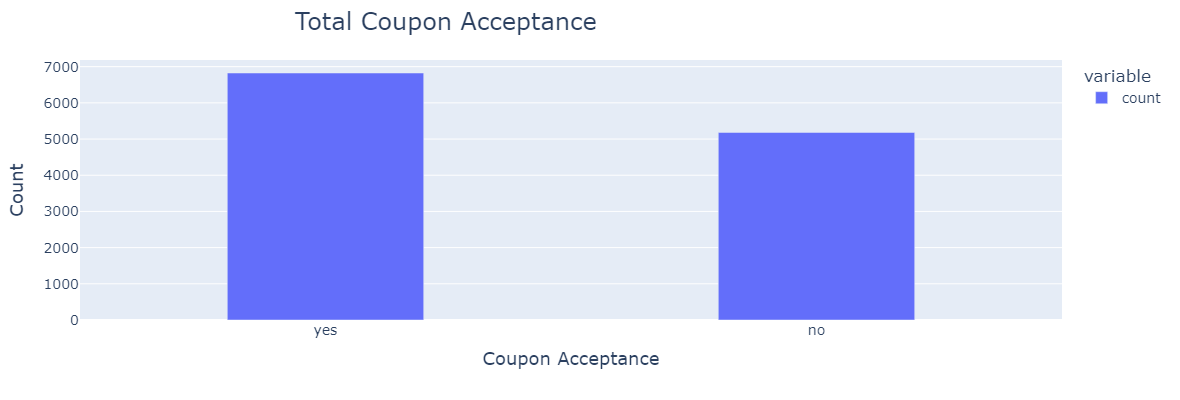

In [20]:
#Percentage of coupons accepted
coupon_accept_pct = data_clean['Y'].mean() * 100
print(str(coupon_accept_pct.round(2)) + '% of the total observations chose to accept the coupon')

#For better visualization create a new dataframe with 1 replace with yes and 0 replaced with no
coupon_accept_df = data_clean['Y'].replace({1:'yes', 0:'no'})


#plot the coupon acceptance distribution
fig = px.bar(coupon_accept_df.value_counts())
fig.update_layout(
    width = 700,
    height = 400,
    bargap=0.6,
    title={'text': 'Total Coupon Acceptance', 'font': {'size': 24}, 'x': 0.25,'xanchor':'left'},
    xaxis_title={'text': 'Coupon Acceptance', 'font': {'size': 18}},
    yaxis_title={'text': 'Count', 'font': {'size': 18}},
    font={'size': 14}
)

fig.update_xaxes(dtick = 1)
fig.show()
fig.write_image("TotalCouponAcceptance.png")



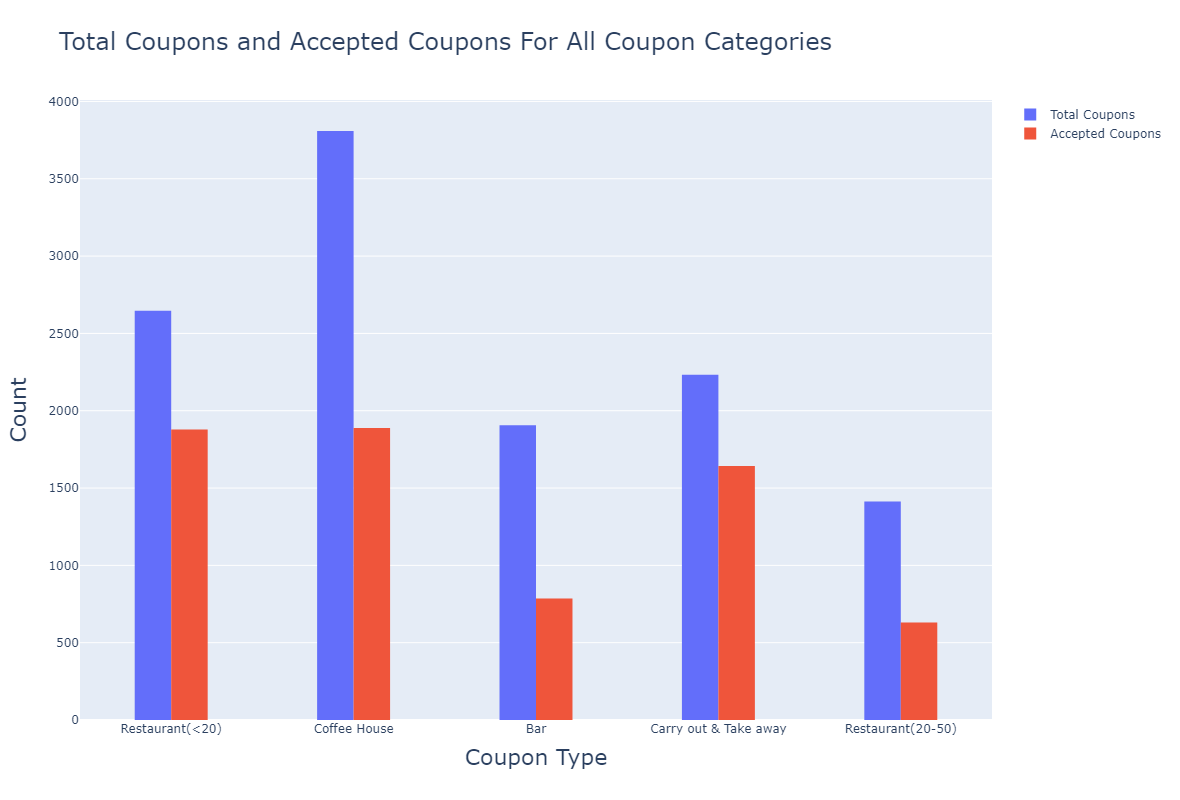

In [21]:
#Plot total number of coupons and total number of accepted coupons in each category

#Data Frame with the condition coupons accepted
coupon_accepted_df = data_clean.query('Y==1')

fig = make_subplots()

# Plot the total number of coupons for each coupon category
fig.add_trace(
    go.Histogram(x=data_clean['coupon'],name="Total Coupons", offsetgroup =0),
    secondary_y=False,
)

# Plot the total number of accepted coupons for each coupon category
fig.add_trace(
    go.Histogram(x=coupon_accepted_df['coupon'], name="Accepted Coupons", offsetgroup =1),
    secondary_y=False,
)

fig.update_layout(
    width = 1000,
    height = 800,
    bargap=0.6,
    title={'text': 'Total Coupons and Accepted Coupons For All Coupon Categories', 'font': {'size': 24}, 'x': 0.05,'xanchor':'left'},
    xaxis_title={'text': 'Coupon Type', 'font': {'size': 22},},
    yaxis_title={'text': 'Count', 'font': {'size': 22}},
    font={'size': 12},
    xaxis={'tickangle': 0}
)

fig.show()
fig.write_image("TotalandAcceptedCoupons.png")



Highest # of Coupons Accepted in CategoryCoffee Housewith maximum value of 1888
coupon
Coffee House             1888
Restaurant(<20)          1878
Carry out & Take away    1643
Bar                       785
Restaurant(20-50)         631
Name: count, dtype: int64
coupon
Coffee House             0.495668
Restaurant(<20)          0.709751
Carry out & Take away    0.735781
Bar                      0.411857
Restaurant(20-50)        0.446568
Name: count, dtype: float64
Highest Percentage of Coupons Accepted in Category Carry out & Take away with 73.6%
Lowest Percentage of Coupons Accepted in Category Bar with 41.199999999999996%


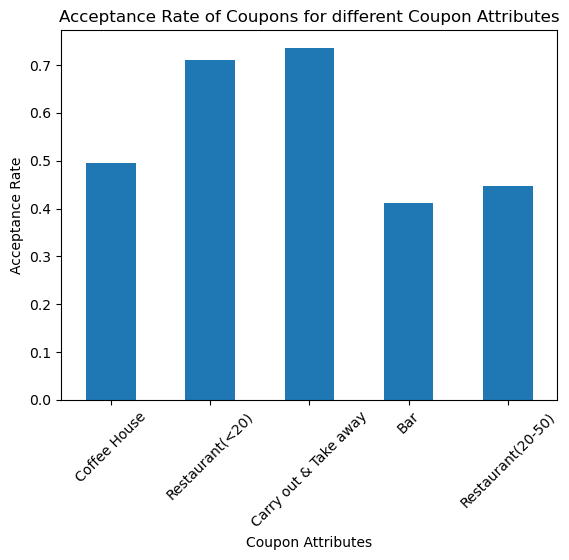

In [22]:
#- Which category of coupons had the highest acceptance value
coupon_with_maxvalue = data_clean.query('Y == 1')['coupon'].value_counts().idxmax()
coupon_maxvalue = data_clean.query('Y==1')['coupon'].value_counts().max()

print('Highest # of Coupons Accepted in Category' + coupon_with_maxvalue + 'with maximum value of ' + str(coupon_maxvalue))

#- Which category of coupons had the highest acceptance percentage

coupon_accepted_count = data_clean.query('Y == 1')['coupon'].value_counts()
coupon_count = data_clean['coupon'].value_counts()
percent_coupon_accpted = coupon_accepted_count/coupon_count

print(coupon_accepted_count)
print(percent_coupon_accpted)

#Find the max percentage value
percent_coupon_accpted_max = round(percent_coupon_accpted.max(),3) * 100
percent_coupon_accpted_min = round(percent_coupon_accpted.min(),3) * 100

#Find the max percentage index
percent_coupon_accpted_val_max = percent_coupon_accpted.idxmax()
percent_coupon_accpted_val_min = percent_coupon_accpted.idxmin()

#plot the results
percent_coupon_accpted.plot(kind='bar')
plt.title('Acceptance Rate of Coupons for different Coupon Attributes')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)


print('Highest Percentage of Coupons Accepted in Category ' + percent_coupon_accpted_val_max + ' with ' + str(percent_coupon_accpted_max) + '%')
print('Lowest Percentage of Coupons Accepted in Category ' + percent_coupon_accpted_val_min + ' with ' + str(percent_coupon_accpted_min) + '%')
plt.savefig('PercAcceptCoupon.png',bbox_inches='tight')

### The Seaborn bar plot function returns the aggregate mean as default. Seen below is for each kind of coupon, the percentage of accepted coupons. 
The above graph and below graph are identical. For the above, the percentage of accepted coupons was manually calculated, whereas for the graph below, Seaborn bar plot was used, which aggregates the data and returns the mean, which is the same as the acceptance rate.

#### Some key takeaways:
- The coupon with a longer expiration duration of 1 day has a higher acceptance rate than the coupon with a shorter expiration rate of 2 hours.
- **Restaurat USD(<$20) and Carry out & Take away**
  - Had high acceptance rates among all attributes including expiration, weather, temperature, passenger, gender, time, destination, age, income, marital status, and having children.
  - One hypothesis to support this is that everyone needs to eat at some point and are ready to consider cost-effective options like RestaranUSDt (<$20) and Carry out & Take away.
- **Coffee House**, **Bar**, and **RestUSDurant ($20-50)**
  - Had lower acceptance rates among all attributes including expiration, weather, temperature, passenger, gender, time, destination, age, income, marital status, and having children.
  - People may not have time to go to a high-end restaurant on short notice of 1 day. It will cost them a lot more money even with the coupon.
  - Bars had higher acceptance among single men in their 20s without kids and friends as passengers. This narrows down the acceptance rate and the bars might not cost them as much to go by themselves anyway.
  - Both men and women had a similar acceptance rate for Coffee House; they would go only when they had nothing urgent to attend to. Like the Bar coupon, the coffee coupon might not give them significant monetary advantage.


### The Seaborn bar plot function returns the aggregate mean as default. Seen below is for each kind of coupon, the percentage of accepted coupons. 
The above graph and below graph are identical. For the above, the percentage of accepted coupons was manually calculated, whereas for the graph below, Seaborn bar plot was used, which aggregates the data and returns the mean, which is the same as the acceptance rate.

#### Some key takeaways:
- The coupon with a longer expiration duration of 1 day has a higher acceptance rate than the coupon with a shorter expiration rate of 2 hours.
- **Restaurant (<20USD) and Carry out & Take away**
  - Had high acceptance rates among all attributes including expiration, weather, temperature, passenger, gender, time, destination, age, income, marital status, and having children.
  - One hypothesis to support this is that everyone needs to eat at some point and are ready to consider cost-effective options like Restaurant ($20USD) and Carry out & Take away.
- **Coffee House**, **Bar, and Restaurant (USD20-50)**
  - Had lower acceptance rates among all attributes including expiration, weather, temperature, passenger, gender, time, destination, age, income, marital status, and having children.
  - People may not have time to go to a high-end restaurant on short notice of 1 day. It will cost them a lot more money even with the coupon.
  - Bars had higher acceptance among single men in their 20s without kids and friends as passengers. This narrows down the acceptance rate and the bars might not cost them as much to go by themselves anyway.
  - Both men and women had a similar acceptance rate for Coffee House; they would go only when they had nothing urgent to attend to. Like the Bar coupon, the coffee coupon might not give them significant monetary advantage.


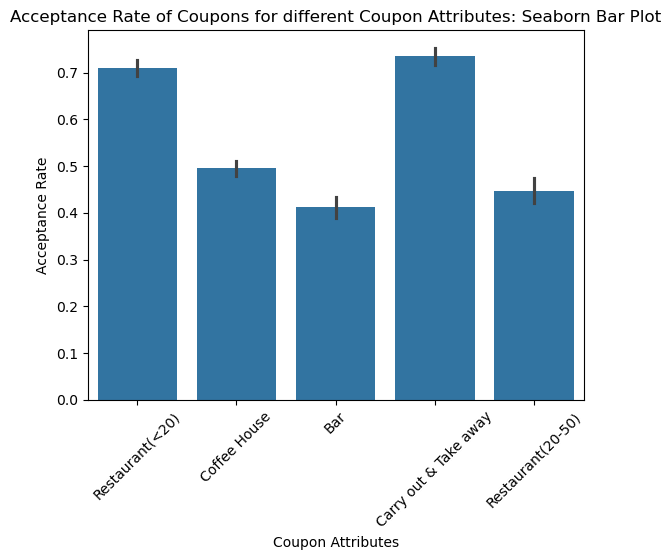

In [25]:
#bar plot using Seaborn to visualize the 'coupon' column
sns.barplot(data=data_clean,x='coupon',y='Y')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons for different Coupon Attributes: Seaborn Bar Plot')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

plt.savefig('PercAccptCouponAttribute.png')

-The Bar Plot below shows the coupon atttibute taking into account its expiration. The coupon with longer epiration duration of 1 day, has been accepted more than the coupon with shorter expiration rate of 2 hours.

Text(0, 0.5, 'Acceptance Rate')

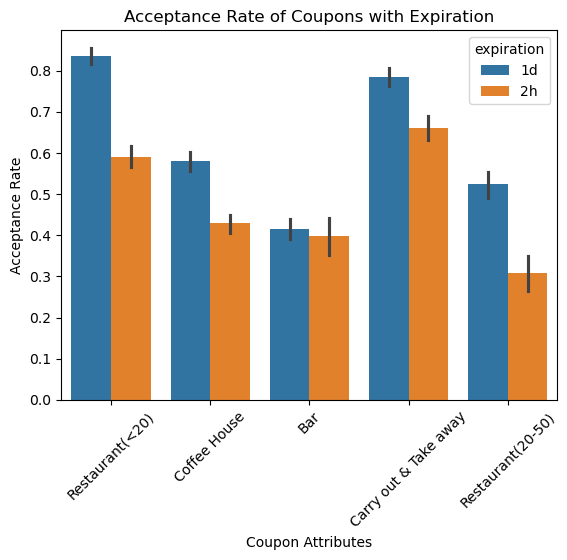

In [27]:
#bar plot using Seaborn to visualize the 'coupon' column over coupon expiration
sns.barplot(data=data_clean,x='coupon',y='Y',hue='expiration')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons with Expiration')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')


### Coupons Acceptance corelation with Temperature: 
- Maximum accpetance for all coupon types are typically on warm days 80F, except for bar coupons with maximum on 55C. On warm days people may want to spend time outdoors
- On cold days (30F) coupon acceptance rate is lower than warmer days. Except for Carry out and Take away. On cold days, people may want to get home sooner and prefer take away


Text(0, 0.5, 'Acceptance Rate')

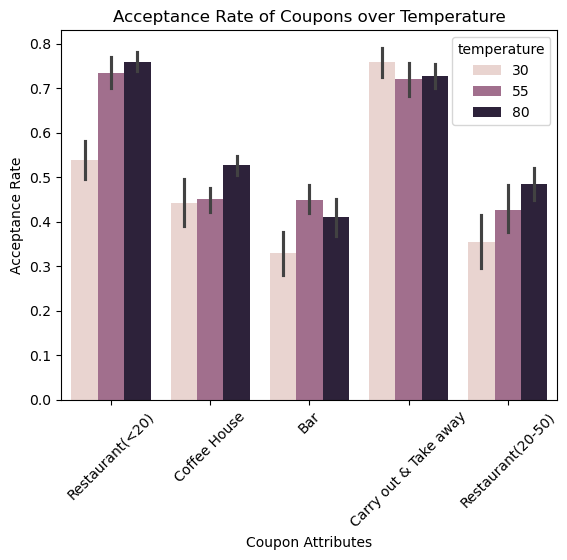

In [29]:
#bar plot using Seaborn to visualize the 'coupon' column over temperature
sns.barplot(data=data_clean,x='coupon',y='Y',hue='temperature')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons over Temperature')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with Weather: 
- Acceptance is higher on sunny days compared to rainy and snowy days, except for Coffee House
- Acceptance is higher for coffee house on rainy days

Text(0, 0.5, 'Acceptance Rate')

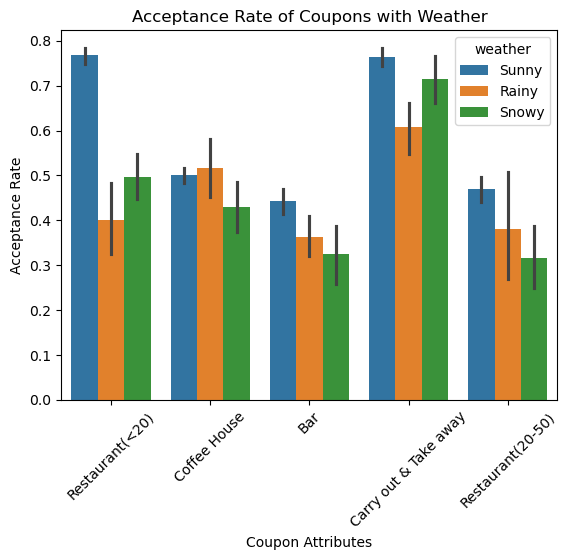

In [31]:
#bar plot using Seaborn to visualize the 'coupon' column over weather
sns.barplot(data=data_clean,x='coupon',y='Y',hue='weather')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons with Weather')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with Passengers in the car: 
- When driving with Friends and Partners the coupon acceptance is higher compared to driving alone and with kids
- Bar coupons are accepted least, when driving with kids
- Carry out and Take Away acceptance rate is independent of the passenger count in the car. This makes sense since it is easier to go through a drive through or make a quick stop, even with kids in the car.

Text(0, 0.5, 'Acceptance Rate')

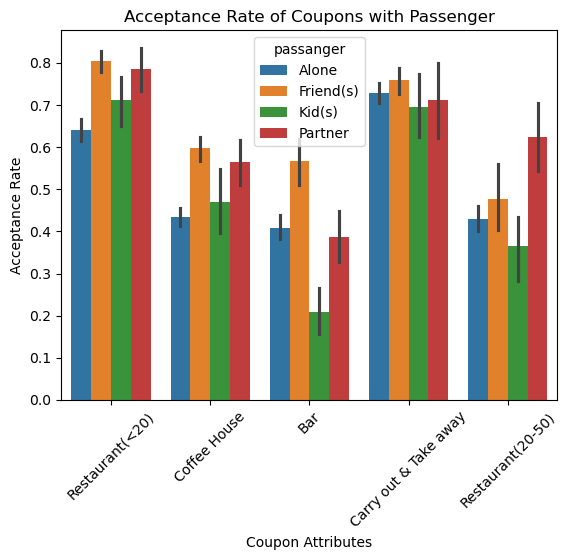

In [33]:
#bar plot using Seaborn to visualize the 'coupon' column over passenger
sns.barplot(data=data_clean,x='coupon',y='Y',hue='passanger')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons with Passenger')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with gender: 

- For bars more Male accepted the coupon compared to Female
- For all other coupons the delta between male and female acceptance is marginal. But men accepted more coupons than women

Text(0, 0.5, 'Acceptance Rate')

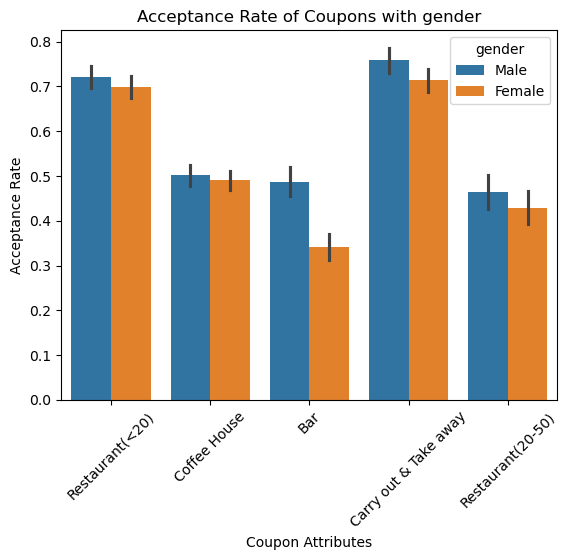

In [35]:
#bar plot using Seaborn to visualize the 'coupon' column with gender
sns.barplot(data=data_clean,x='coupon',y='Y',hue='gender')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons with gender')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with time: 
- Bar Coupon: Higher Acceptance at 6:00 pm and 10 pm



Text(0, 0.5, 'Acceptance Rate')

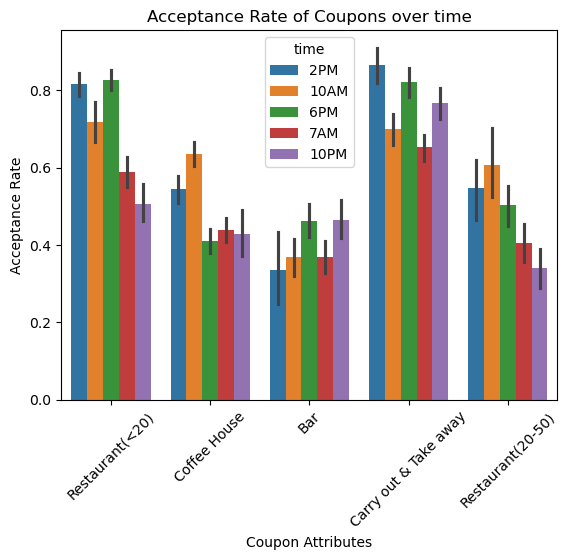

In [37]:
#bar plot using Seaborn to visualize the 'coupon' column with time
sns.barplot(data=data_clean,x='coupon',y='Y',hue='time')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons over time')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with destination: 


Text(0, 0.5, 'Acceptance Rate')

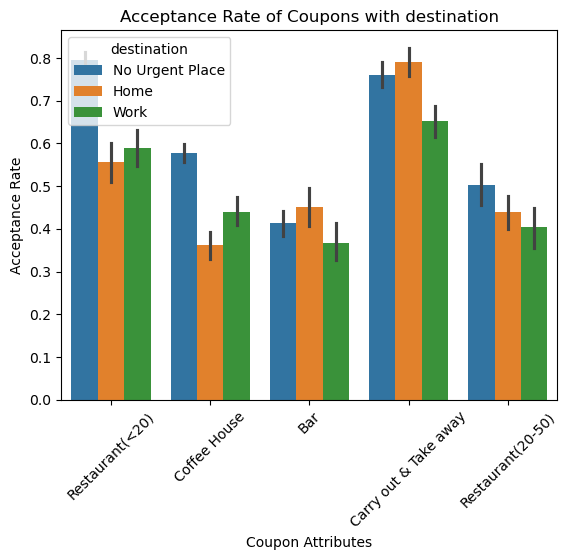

In [39]:
#bar plot using Seaborn to visualize the 'coupon' column with destination
sns.barplot(data=data_clean,x='coupon',y='Y',hue='destination')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons with destination')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with Age: 


Text(0, 0.5, 'Acceptance Rate')

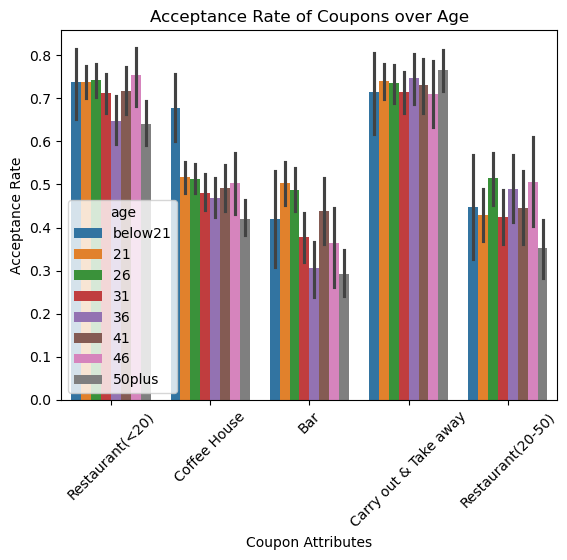

In [41]:
#bar plot using Seaborn to visualize the 'coupon' column with Age
sns.barplot(data=data_clean,x='coupon',y='Y',hue='age')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons over Age')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with Marital Status: 
- Single people had higher acceptance rate for bar coupon
- Widowed people accepted more carry out and take away coupons and do not dine out as much as the others


Text(0, 0.5, 'Acceptance Rate')

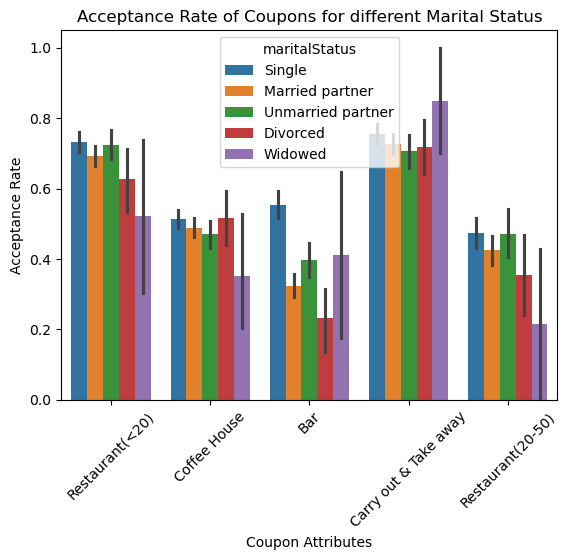

In [43]:
#bar plot using Seaborn to visualize the 'coupon' column with Marital Status
sns.barplot(data=data_clean,x='coupon',y='Y',hue='maritalStatus')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons for different Marital Status')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

### Coupons Acceptance corelation with children: 

- People with children had lower acceptance rate for Bar coupon


Text(0, 0.5, 'Acceptance Rate')

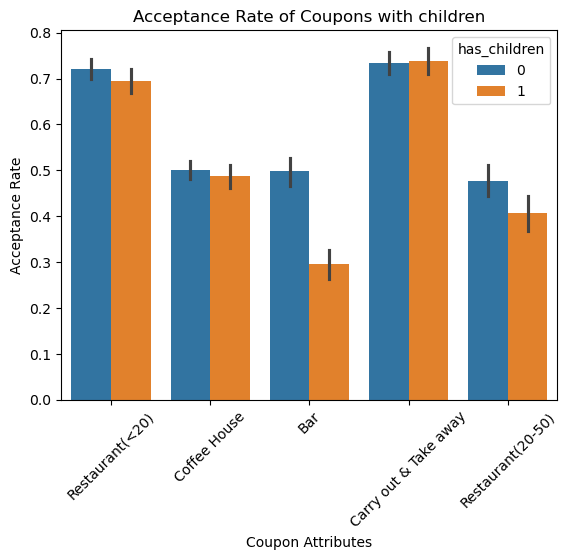

In [45]:
#bar plot using Seaborn to visualize the 'coupon' column with Children
sns.barplot(data=data_clean,x='coupon',y='Y',hue='has_children')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons with children')
plt.xlabel('Coupon Attributes')
plt.ylabel('Acceptance Rate')

6. Use a histogram to visualize the temperature column.

### Temperature histogram plot
- Indicates ~50% of the coupons were given on a warm day ~80F
- Least amount of coupons were given on a cold day ~30F
  

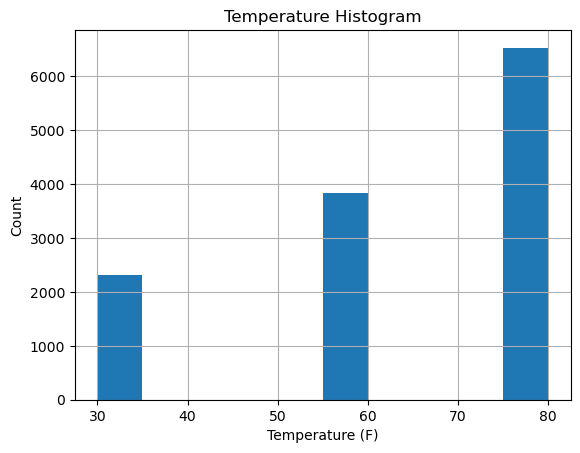

In [48]:
data.hist('temperature')

plt.title('Temperature Histogram')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.savefig('temperature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [50]:
#Data Frame with only bar coupons
bar_df = data_clean.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?
- **41.0% of Bar Coupons were accepted**



In [52]:
#Proportion of bar coupons that were accepted
bar_coupon_accpt_ratio = bar_df['Y'].mean()
bar_coupon_accpt_percent = round(bar_coupon_accpt_ratio,4) * 100
print(str(bar_coupon_accpt_percent) + '% of Bar Coupons were accepted')

41.19% of Bar Coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
- **Acceptance rate of those who went to a bar 3 or fewer times a month:** 0.37
- **Acceptance rate of those who went to a bar more than 3 times a month:** 0.7



In [54]:
bar_freq = data_clean['Bar'].unique()

#Acceptance rate of those who went to bar 3 or fewer times a month
bar_accpt_rate_lessthan3 = bar_df.query('Bar == "never" | Bar == "less1" | Bar == "1~3"')['Y'].mean()

#Acceptance rate of those who went to bar more than 3 times a month
bar_accpt_rate_morethan3 = bar_df.query('Bar == "gt8" | Bar == "4~8"')['Y'].mean()

print('Acceptance rate of those who went to bar 3 or fewer times a month is ' + str(round(bar_accpt_rate_lessthan3,2)))
print('Acceptance rate of those who went to bar more than 3 times a month is ' + str(round(bar_accpt_rate_morethan3,2)))

Acceptance rate of those who went to bar 3 or fewer times a month is 0.37
Acceptance rate of those who went to bar more than 3 times a month is 0.76


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all others. Is there a difference?
- **Acceptance rate of those who went to a bar more than once a month and are above the age of 25:** 0.69
- **Acceptance rate of those who went to a bar more than once a month across all age groups:** 0.69
- **Conclusion:** There is no difference between the two categories. People under 21 cannot drink legally. This reduces the data population under the category below 25.


In [56]:
#Bar categories corresponding more than once  amonth  
bar_above1_month = ['1~3', 'gt8', '4~8']

#Age categories corresponding to above 25  
age_above_25 = ['46', '26', '31', '41', '50plus', '36']

#All age categories
age_all = ['21', '46', '26', '31', '41', '50plus', '36', 'below21']


#Acceptance rate of those who went to bar more than once a month and above age 25
bar_accpt_rate_morethan1_age_above25 = bar_df.query('Bar in @bar_above1_month and age in @age_above_25')['Y'].mean()

print('Acceptance rate of those who went to bar more than once a month and above the age of 25 is ' + str(round(bar_accpt_rate_morethan1_age_above25,2)))


#Acceptance rate of those who went to bar more than once a month and all ages
bar_accpt_rate_morethan1_age_all = bar_df.query('Bar in @bar_above1_month and age in @age_all')['Y'].mean()

print('Acceptance rate of those who went to bar more than once a month and all age group is ' + str(round(bar_accpt_rate_morethan1_age_all,2)))

print('There is no difference between the two categories')

Acceptance rate of those who went to bar more than once a month and above the age of 25 is 0.69
Acceptance rate of those who went to bar more than once a month and all age group is 0.69
There is no difference between the two categories


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
- **Acceptance rate: Bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry**: 0.71




In [58]:
#Bar categories corresponding to more than once a month visit  
bar_above1_month = ['1~3', 'gt8', '4~8']

#Passenger categories corresponding to all passengers except kid
passenger_wo_kid = ['Alone', 'Friend(s)', 'Partner']

#Occupation categories other than farming, fishing, or forestry.
occupation_filter = [
    'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
]


bar_accpt_rate_filter = bar_df.query('Bar in @bar_above1_month and passanger in @passenger_wo_kid and occupation in @occupation_filter')['Y'].mean()
print('Acceptance rate:Bar more than once a month and and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. ' + str(round(bar_accpt_rate_filter,2)))


Acceptance rate:Bar more than once a month and and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 0.71


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

- **Acceptance rate:** Go to bars more than once a month, had passengers that were not a kid, and were not widowed: **0.71**
- **Acceptance rate:** Go to bars more than once a month and are under the age of 30: **0.72**
- **Acceptance rate:** Go to cheap restaurants more than 4 times a month and income is less than 50K: **0.46**

In [60]:
#Bar categories corresponding to more than once a month visit  
bar_above1_month = ['1~3', 'gt8', '4~8']

#Passenger categories corresponding to all passengers except kid
passenger_wo_kid = ['Alone', 'Friend(s)', 'Partner']

#Passenger categories
passenger_all = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']

#Marital Status categories corresponding to not widowed
maritalStatus_notwidow = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']

#Age under 30
age_under30 = ['21', '26', 'below21']

#Go to Cheap restuarants more than 4 times a month
RestaurantLessThan20_flt = ['4~8', 'gt8'] 

#Income below 50K
income_below50K =['$12500 - $24999', '$37500 - $49999', '$25000 - $37499','Less than $12500']


bar_accpt_rate_filter2 = bar_df.query('Bar in @bar_above1_month and passanger in @passenger_wo_kid and maritalStatus in @maritalStatus_notwidow')['Y'].mean()
print('Acceptance rate:go to bars more than once a month, had passengers that were not a kid, and were not widowed ' + str(round(bar_accpt_rate_filter2,2)))

bar_accpt_rate_filter3 = bar_df.query('Bar in @bar_above1_month and age in @age_under30')['Y'].mean()
print('Acceptance rate:go to bars more than once a month and are under the age of 30 ' + str(round(bar_accpt_rate_filter3,2)))


bar_accpt_rate_filter4 = bar_df.query('RestaurantLessThan20 in @RestaurantLessThan20_flt and income in @income_below50K')['Y'].mean()
print('Acceptance rate:go to cheap restaurants more than 4 times a month and income is less than 50K ' + str(round(bar_accpt_rate_filter4,2)))

bar_accpt_rate_filter5 = bar_df.query('RestaurantLessThan20 in @RestaurantLessThan20_flt')['Y'].mean()
print('Acceptance rate:go to cheap restaurants more than 4 times a month will all income' + str(round(bar_accpt_rate_filter5,2)))


bar_accpt_rate_filter6 = bar_df.query('Bar in @bar_above1_month and passanger in @passenger_wo_kid and maritalStatus in @maritalStatus_notwidow')['Y'].mean()
print('Acceptance rate:go to bars more than once a month, all passengers included, and were not widowed ' + str(round(bar_accpt_rate_filter6,2)))


Acceptance rate:go to bars more than once a month, had passengers that were not a kid, and were not widowed 0.71
Acceptance rate:go to bars more than once a month and are under the age of 30 0.72
Acceptance rate:go to cheap restaurants more than 4 times a month and income is less than 50K 0.46
Acceptance rate:go to cheap restaurants more than 4 times a month will all income0.43
Acceptance rate:go to bars more than once a month, all passengers included, and were not widowed 0.71


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Bar Coupon Observation Summary
- **41.0% of Bar Coupons were accepted**
- Acceptance rate of those who went to a bar 3 or fewer times a month: **0.37**
- Acceptance rate of those who went to a bar more than 3 times a month: **0.77**
- Acceptance rate of those who went to a bar more than once a month and are above the age of 25: **0.69**
- Acceptance rate of those who went to a bar more than once a month across all age groups: **0.69**
- Conclusion:** There is no difference between the two categories.
- Acceptance rate: Bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: **0.71**
- Acceptance rate: Go to bars more than once a month, had passengers that were not a kid, and were not widowed: **0.71**
- Acceptance rate: Go to bars more than once a month and are under the age of 30: **0.72**
- Acceptance rate: Go to cheap restaurants more than 4 times a month and income is less than 50K: **0.46**
- Acceptance rate: Go to cheap restaurants more than 4 times a month and all incomes: **0.43**

### Bar Coupon Driver Hypothesis

- **Drivers who went to the bar more than 3 times a month are more likely to accept the Bar coupon**
- **Drivers under the age of 25 are less likely to accept the Bar coupon**
- **Drivers with kids are less likely to accept the Bar coupon**
- **Drivers under age 30 are more likely to accept the Bar coupon**
- **Drivers with passengers as friends are more likely to accept the Bar coupon**
- **Income level doesn't contribute much to Bar coupon acceptance rate:**
  - Income below 50K has an acceptance rate of 0.43 compared to the acceptance rate of 0.43 for all incomes


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Problem Statement#1: What are the differences between male and female drivers acceptance rate.
- Female and male acceptance rate: 0.55 and 0.59 respectively
- More Men accepted the coupon compared to Women by 4 %. Is it because the women have lower buying power. Lets see the difference between the womens and mens income, job and education. What percentage of the data is men and women?
- In the survery there are actually more women than male (6158) than female (5849)
-Data also shows Women do earn lesser in average compared to men. 
-There is no corelation between income and coupon acceptance rate for both men and women
      -Although both men and women in the category of "some high school" education had the highest acceptance rate
      -It was interesting to see that men and women with "some high school", their income level was below 25K, even though they were in age category ['26' '31' '46']. The ratio of men and women in this category was 50%. Their economic condition explains the higher coupon acceptance rate
- People with children had a lower acceptance rate of 0.54 compared to the group without children 0.59. 
  

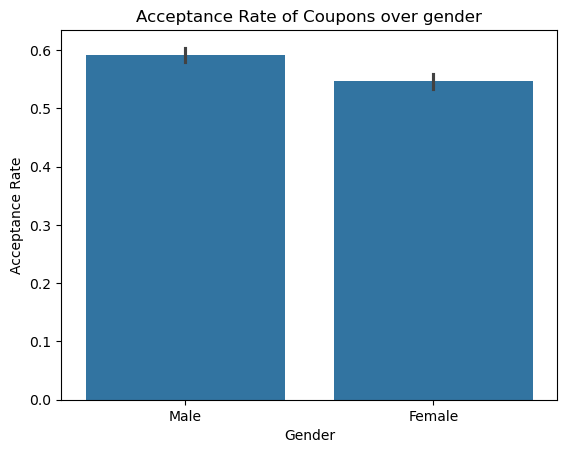

In [66]:
sns.barplot(data_clean,x='gender',y='Y')
plt.title('Acceptance Rate of Coupons over gender')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate')
plt.savefig('gender.png')

In [67]:
#Calculate male and female acceptance rate

male_female_accpt = data_clean.groupby('gender')['Y'].mean().round(2)
print(male_female_accpt)


gender
Female    0.55
Male      0.59
Name: Y, dtype: float64


    gender            income     Y
0   Female  Less than $12500  0.58
1   Female   $12500 - $24999  0.54
2   Female   $25000 - $37499  0.61
3   Female   $37500 - $49999  0.51
4   Female   $50000 - $62499  0.56
5   Female   $62500 - $74999  0.44
6   Female   $75000 - $87499  0.51
7   Female   $87500 - $99999  0.48
8   Female   $100000 or More  0.55
9     Male  Less than $12500  0.59
10    Male   $12500 - $24999  0.62
11    Male   $25000 - $37499  0.57
12    Male   $37500 - $49999  0.64
13    Male   $50000 - $62499  0.61
14    Male   $62500 - $74999  0.59
15    Male   $75000 - $87499  0.47
16    Male   $87500 - $99999  0.55
17    Male   $100000 or More  0.60


C:\Users\anu.arun\AppData\Local\Temp\ipykernel_3852\3349240052.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



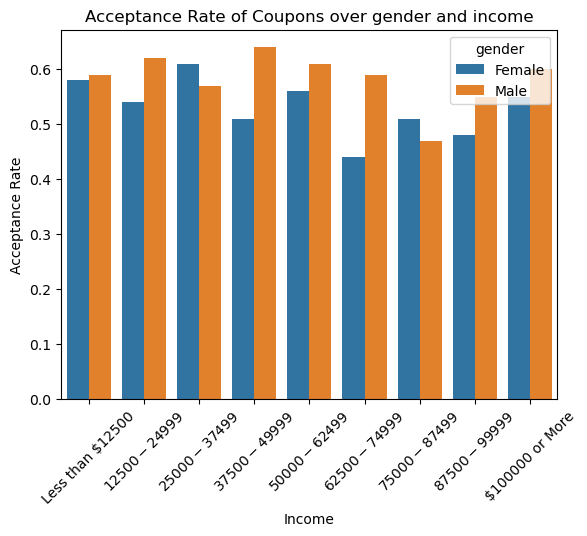

In [68]:
#comparison between men and women, who accepted the coupon and their income level

male_female_accpt_income = data_clean.groupby(['gender','income'])['Y'].mean().round(2)

#Reset index
male_female_accpt_income_reset_index = male_female_accpt_income.reset_index()

print(male_female_accpt_income_reset_index)

sns.barplot(male_female_accpt_income_reset_index,x='income',y='Y',hue='gender')
plt.xticks(rotation = 45)

plt.title('Acceptance Rate of Coupons over gender and income')
plt.xlabel('Income')
plt.ylabel('Acceptance Rate')
plt.savefig('gender_income.png')

C:\Users\anu.arun\AppData\Local\Temp\ipykernel_3852\4132015710.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



    gender                               education     Y
0   Female                        Some High School  0.68
1   Female                    High School Graduate  0.60
2   Female                Some college - no degree  0.57
3   Female                       Associates degree  0.53
4   Female                        Bachelors degree  0.53
5   Female  Graduate degree (Masters or Doctorate)  0.50
6     Male                        Some High School  0.75
7     Male                    High School Graduate  0.59
8     Male                Some college - no degree  0.62
9     Male                       Associates degree  0.59
10    Male                        Bachelors degree  0.58
11    Male  Graduate degree (Masters or Doctorate)  0.55


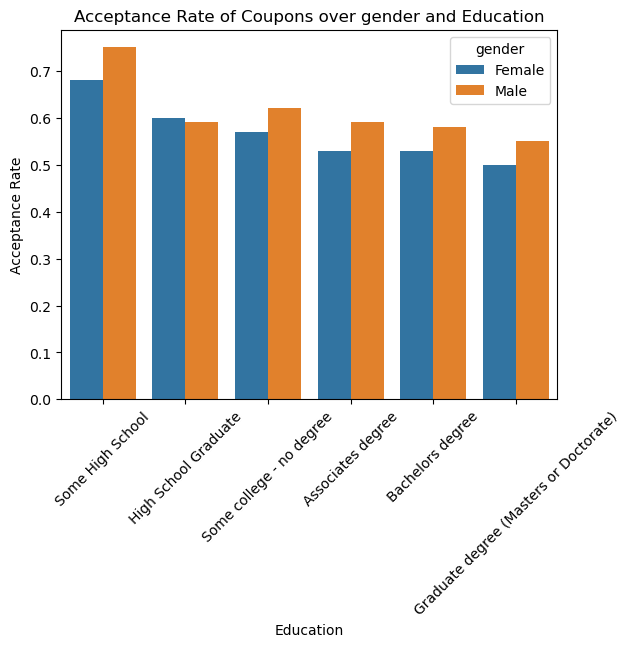

In [69]:
#comparison between men and women, who accepted the coupon and their income level

male_female_accpt_edu = data_clean.groupby(['gender','education'])['Y'].mean().round(2)

#Reset index
male_female_accpt_edu_reset_index = male_female_accpt_edu.reset_index()
print(male_female_accpt_edu_reset_index)
sns.barplot(male_female_accpt_edu_reset_index,x='education',y='Y',hue='gender')
plt.xticks(rotation = 45)
plt.title('Acceptance Rate of Coupons over gender and Education')
plt.xlabel('Education')
plt.ylabel('Acceptance Rate')
plt.savefig('gender_education.png',bbox_inches='tight')

In [70]:
#What percentage of the data is men and women

Female_count = data_clean.query('gender == "Female"')['gender'].count()
Male_count = data_clean.query('gender == "Male"')['gender'].count()

print(Female_count)
print(Male_count)

6158
5849


### Age category count is smaller compared to the other categories

Text(0.5, 1.0, 'Age Histogram')

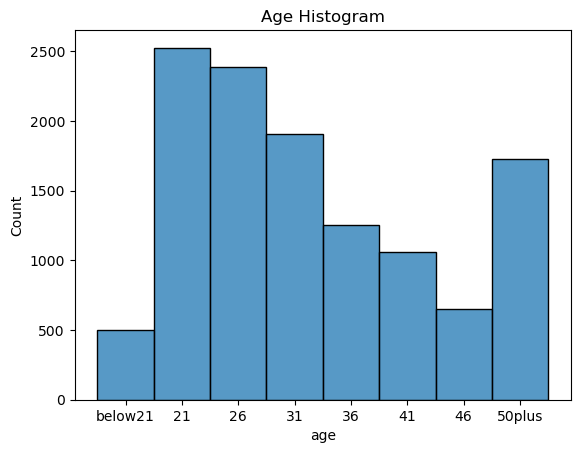

In [72]:
#What is the age distribution 

sns.histplot(data_clean['age'])
plt.title('Age Histogram')


In [73]:
#What is the age of the population with education category "some high school"

age_some_highSchool = data_clean.query('education == "Some High School"')['age'].value_counts()
print(age_some_highSchool)
print(type(age_some_highSchool))

age
26         44
31         22
46         22
below21     0
21          0
36          0
41          0
50plus      0
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [74]:
#What is the gender distribution of the population with education category "some high school"

gender_some_highSchool = data_clean.query('education == "Some High School"')['gender'].value_counts()
print(gender_some_highSchool)

gender
Female    44
Male      44
Name: count, dtype: int64


In [75]:
#How does how many children you have affect coupon acceptance. Does this change with marital status

has_child_accpt = data_clean.groupby(['has_children'])['Y'].mean().round(2)
print(has_child_accpt)

maritalStatus_accept = data_clean.groupby(['maritalStatus'])['Y'].mean().round(2)
print(maritalStatus_accept)

has_child_maritalStatus = data_clean.groupby(['has_children','maritalStatus'])['Y'].mean().round(2)
print(has_child_maritalStatus)

has_child_maritalStatus = has_child_maritalStatus.reset_index()
print(has_child_maritalStatus)

has_children
0    0.59
1    0.54
Name: Y, dtype: float64
maritalStatus
Divorced             0.52
Married partner      0.54
Single               0.61
Unmarried partner    0.56
Widowed              0.47
Name: Y, dtype: float64
has_children  maritalStatus    
0             Divorced             0.47
              Married partner      0.55
              Single               0.61
              Unmarried partner    0.57
              Widowed              0.36
1             Divorced             0.53
              Married partner      0.54
              Single               0.58
              Unmarried partner    0.50
              Widowed              0.55
Name: Y, dtype: float64
   has_children      maritalStatus     Y
0             0           Divorced  0.47
1             0    Married partner  0.55
2             0             Single  0.61
3             0  Unmarried partner  0.57
4             0            Widowed  0.36
5             1           Divorced  0.53
6             1    Married partn

has_children
0    0.59
1    0.54
Name: Y, dtype: float64
income
Less than $12500    0.59
$12500 - $24999     0.58
$25000 - $37499     0.60
$37500 - $49999     0.57
$50000 - $62499     0.59
$62500 - $74999     0.53
$75000 - $87499     0.49
$87500 - $99999     0.52
$100000 or More     0.58
Name: Y, dtype: float64
has_children  income          
0             Less than $12500    0.61
              $12500 - $24999     0.59
              $25000 - $37499     0.63
              $37500 - $49999     0.62
              $50000 - $62499     0.60
              $62500 - $74999     0.55
              $75000 - $87499     0.45
              $87500 - $99999     0.56
              $100000 or More     0.58
1             Less than $12500    0.50
              $12500 - $24999     0.55
              $25000 - $37499     0.56
              $37500 - $49999     0.51
              $50000 - $62499     0.58
              $62500 - $74999     0.50
              $75000 - $87499     0.54
              $87500 - $99999   

C:\Users\anu.arun\AppData\Local\Temp\ipykernel_3852\1810913150.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\anu.arun\AppData\Local\Temp\ipykernel_3852\1810913150.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0, 0.5, 'Acceptance Rate')

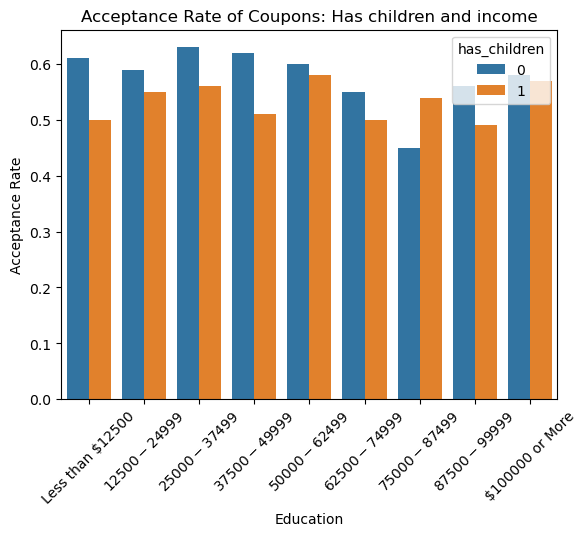

In [76]:
#How does how many children you have affect coupon acceptance. Does this change with income

has_child_accpt = data_clean.groupby(['has_children'])['Y'].mean().round(2)
print(has_child_accpt)

income_accept = data_clean.groupby(['income'])['Y'].mean().round(2)
print(income_accept)

has_child_income = data_clean.groupby(['has_children','income'])['Y'].mean().round(2)
print(has_child_income)

has_child_income = has_child_income.reset_index()
sns.barplot(has_child_income,x='income',y='Y',hue='has_children')
plt.xticks(rotation = 45)
plt.title('Acceptance Rate of Coupons: Has children and income')
plt.xlabel('Education')
plt.ylabel('Acceptance Rate')

### Correlation between education and income is as expected; lower the education, lower the income

Text(0.5, 1.0, 'Income over education')

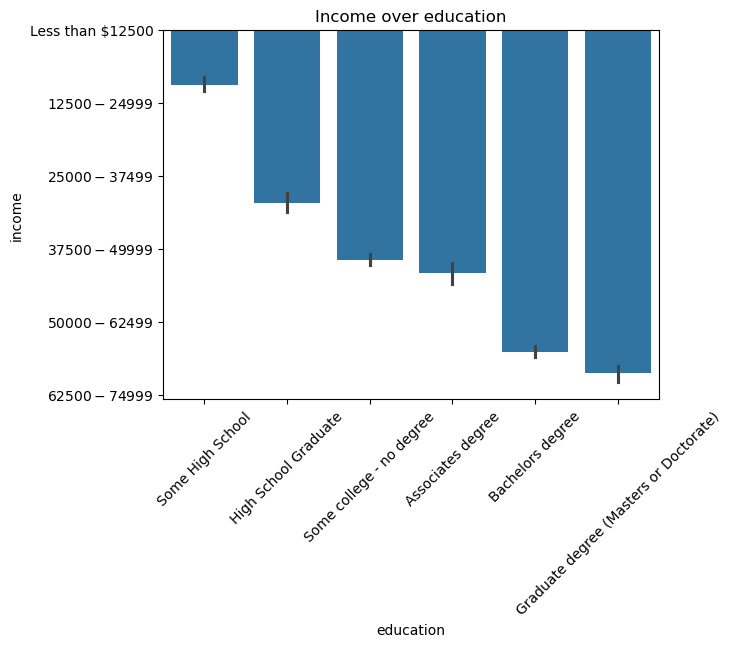

In [78]:
sns.barplot(data_clean,x='education',y='income')
plt.xticks(rotation=45)
plt.title('Income over education')


gender
Female    0.546606
Male      0.591383
Name: Y, dtype: float64


Text(0.5, 1.0, 'Income over Gender')

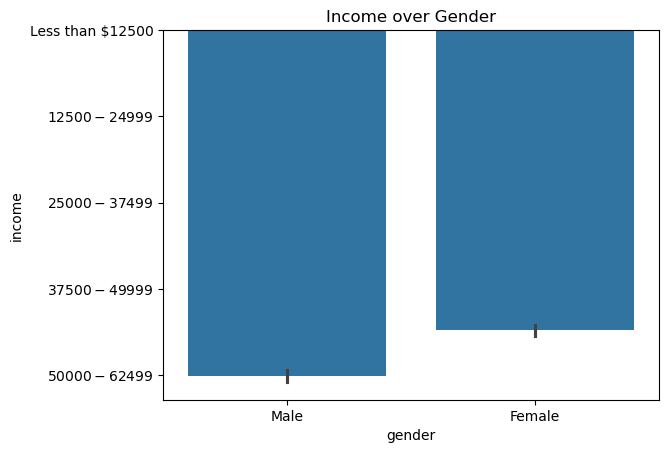

In [79]:
#Gender Vs Income

sns.barplot(data_clean,x='gender',y='income')
avg_salary = data_clean.groupby('gender')['Y'].mean()
print(avg_salary)

plt.title('Income over Gender')


In [80]:
# Define the mapping of income categories to their midpoints
income_mapping = {
    'Less than $12500': 6250,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or More': 100000
}

# Create a copy of the DataFrame to avoid modifying the original
data_clean_newmap = data_clean.copy()

# Map the income column to numerical values
data_clean_newmap['incomeMap'] = data_clean_newmap['income'].map(income_mapping)


data_clean_newmap['incomeMap'] = data_clean_newmap['incomeMap'].astype(float)

# Group by gender and calculate the average income
avg_salary = data_clean_newmap.groupby('gender')['incomeMap'].mean()

print(avg_salary)

gender
Female    49023.627801
Male      55381.261754
Name: incomeMap, dtype: float64


### Problem Statement#2: What will be the acceptance ratio when the sample size of the survey is randomly reduced to half, quarter and one tenth?

In [82]:
#Create a new data frame that has 50% of the content of original data frame randomly selected
data_clean_sampled = data_clean.sample(frac=0.5,random_state =1)
data_clean_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6004 entries, 7377 to 3662
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           6004 non-null   object  
 1   passanger             6004 non-null   object  
 2   weather               6004 non-null   object  
 3   temperature           6004 non-null   int64   
 4   time                  6004 non-null   object  
 5   coupon                6004 non-null   category
 6   expiration            6004 non-null   object  
 7   gender                6004 non-null   object  
 8   age                   6004 non-null   category
 9   maritalStatus         6004 non-null   object  
 10  has_children          6004 non-null   int64   
 11  education             6004 non-null   category
 12  occupation            6004 non-null   object  
 13  income                6004 non-null   category
 14  Bar                   6004 non-null   object  
 15  Coffee

In [83]:
#Create a new data frame that has 50% of the content of original data frame randomly selected
data_clean_sampled_half = data_clean.sample(frac=0.5,random_state =1)

#Create a new data frame that has 25% of the content of original data frame randomly selected
data_clean_sampled_quarter = data_clean.sample(frac=0.25,random_state =1)

#Create a new data frame that has 25% of the content of original data frame randomly selected
data_clean_sampled_onetenth = data_clean.sample(frac=0.1,random_state =1)

#Acceptance rate for full data set
accpt_rate_fullDataset = data_clean['Y'].mean().round(2)

#Acceptance rate for half data set
acct_rate_halfDataset = data_clean_sampled_half['Y'].mean().round(2)

#Acceptance rate for quarter data set
acct_rate_quarterDataset = data_clean_sampled_quarter['Y'].mean().round(2)

#Acceptance rate for 1/10 th data set
acct_rate_oneTenthDataset = data_clean_sampled_onetenth['Y'].mean().round(2)


print(accpt_rate_fullDataset)
print(acct_rate_halfDataset)
print(acct_rate_quarterDataset)
print(acct_rate_oneTenthDataset)

0.57
0.57
0.58
0.59


### Central limit theorem validation
- For sample size above 30 the distribution is gaussian  and the mean is close to 0.57

Mean from KDE for sample size 5:0.573
Mean from KDE for sample size 10:0.5705999999999999
Mean from KDE for sample size 30:0.5717333333333333
Mean from KDE for sample size 50:0.56836
Mean from KDE for sample size 100:0.5659


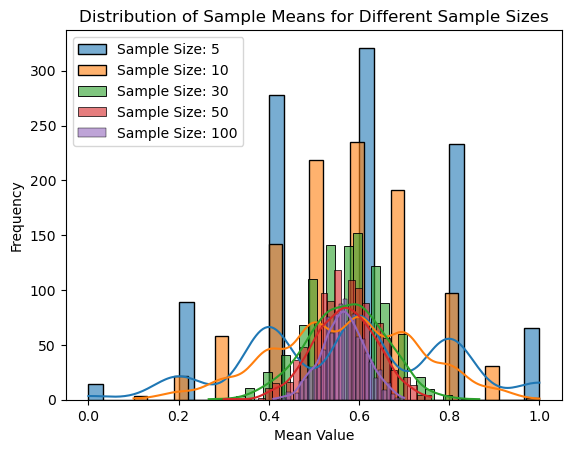

In [85]:
# Number of samples to test
sample_sizes = [5,10, 30, 50, 100]

# Number of times to repeat the sampling
num_iterations = 1000

# Dictionary to store means
means_dict = {}

for size in sample_sizes:
    means = []
    for _ in range(num_iterations):
        sample = data_clean.sample(n=size, replace=True)
        sample_mean = sample['Y'].mean()
        means.append(sample_mean)
    means_dict[size] = means


# Plotting with Seaborn
for size in sample_sizes:
    sns.histplot(means_dict[size], bins=30, kde=True, label=f'Sample Size: {size}', alpha=0.6)
    
    #Fit kde
    kde = gaussian_kde(means_dict[size])

    #Calculate mean from kde
    kde_mean = np.mean(kde.dataset)
    print(f'Mean from KDE for sample size {size}:{kde_mean}')


plt.title('Distribution of Sample Means for Different Sample Sizes')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### Problem Statement#2: Why does Carry away and takeout coupon category have the maximum acceptance rate

- **Regardless of how often drivers took takeaways previously, they all accepted the coupon with a similar rate.**
  - Interestingly, people who did not get takeaways during a month had the highest acceptance rate of 0.78.
- **Even with kids as passengers, the acceptance rate was 0.695. Some of these storemight s have drive-through options, which might help with the decision.**
- **Income did not factor into the decision. Acceptance rate for Carry Away and Take out with, income below 50K and above 50K was 0.75 and 0.72 respectively.**
- **Widowed people had a higher acceptance rate compared to other marital statuses. People with other marital statuses also had high acceptance rates.**
- **In rainy weather, the coupon acceptance rate was lowest, followed by snowy days and warm days.**
  - Even for rainy weather, the coupon acceptance rate was 0.61
- **When destination is Home: the acceptance is highest at 0.79 compared to acceptance of 0.65 when destination is work**
- **Having children or not doesnt affect the acceptance rate**
- **Probably the convenience of Carry Away and Take Out is the reason the acceptance rate is high.**
  - We may have also developed the habit of takeaways during the Covid pandemic. It will be interesting to see what the data was before and after the pandemic.ndemic.
- **This is also an essential meal and might be the reason that driver sought out for this more**


In [87]:
#New Data Frame with onlu Carry out & Take away coupons
df_Carryout_filtered = data_clean.query('coupon == "Carry out & Take away"')

In [88]:
#Categories in Carry Away
CarryAway_order = ['never','less1','1~3','4~8','gt8']

Acceptance rate for Carry Away and Take out, who previously did not get take aways even once a month 0.78


Text(0, 0.5, 'Acceptance Rate')

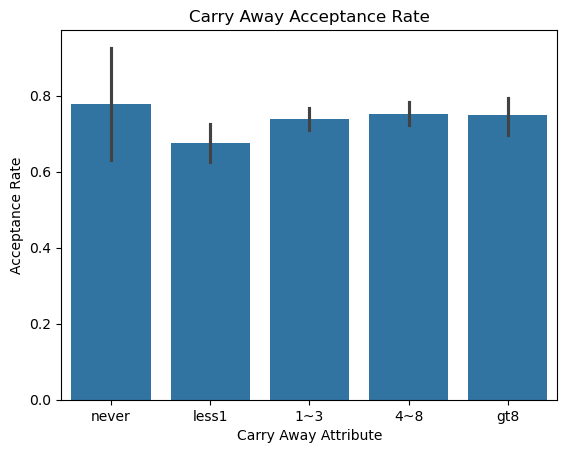

In [89]:
sns.barplot(df_Carryout_filtered,x='CarryAway',y='Y')

Carry_accpt_never = df_Carryout_filtered.query('CarryAway== "never"')['Y'].mean()
print('Acceptance rate for Carry Away and Take out, who previously did not get take aways even once a month ' + str(round(Carry_accpt_never,2)))
plt.title('Carry Away Acceptance Rate')
plt.xlabel('Carry Away Attribute')
plt.ylabel('Acceptance Rate')

Acceptance rate for Carry Away and Take out, inclome below 50K 0.75
Acceptance rate for Carry Away and Take out, inclome above 50K 0.72


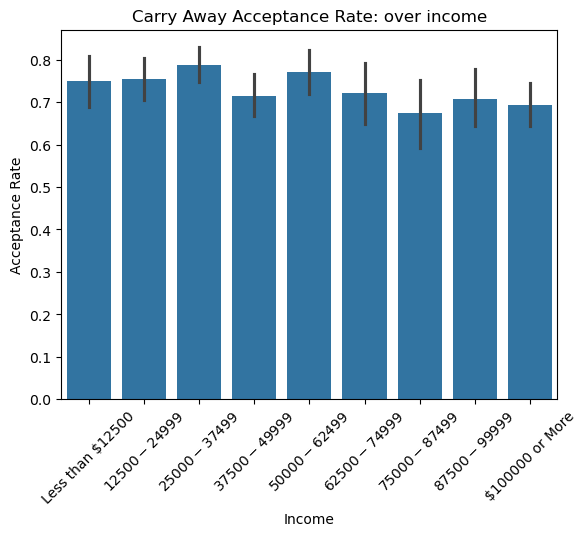

In [90]:
sns.barplot(df_Carryout_filtered,x='income',y='Y')
plt.xticks(rotation = 45)

plt.title('Carry Away Acceptance Rate: over income')
plt.xlabel('Income')
plt.ylabel('Acceptance Rate')

#income below 50K
income_below50K =['$12500 - $24999', '$37500 - $49999', '$25000 - $37499','Less than $12500']

#income above 50K
income_above50K =['$62500 - $74999', '$75000 - $87499', '$50000 - $62499', '$100000 or More', '$87500 - $99999']

Carry_accpt_incomebelow50K = df_Carryout_filtered.query('income in @ income_below50K')['Y'].mean()
Carry_accpt_incomeabove50K = df_Carryout_filtered.query('income in @ income_above50K')['Y'].mean()

print('Acceptance rate for Carry Away and Take out, inclome below 50K ' + str(round(Carry_accpt_incomebelow50K,2)))
print('Acceptance rate for Carry Away and Take out, inclome above 50K ' + str(round(Carry_accpt_incomeabove50K,2)))


Text(0, 0.5, 'Acceptance Rate')

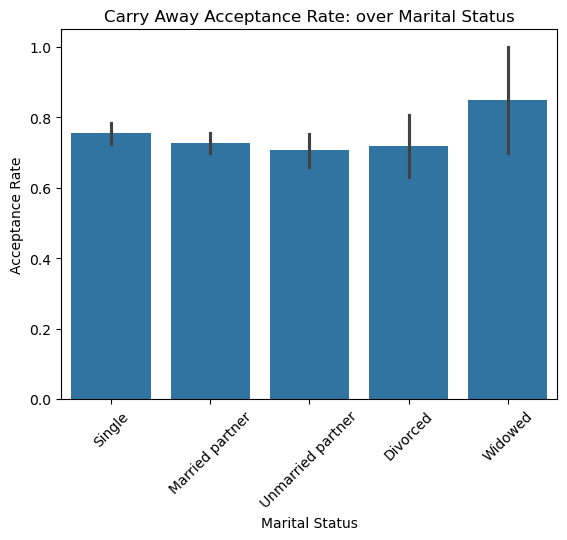

In [91]:
sns.barplot(df_Carryout_filtered,x='maritalStatus',y='Y')
plt.xticks(rotation = 45)
plt.title('Carry Away Acceptance Rate: over Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')

0.6950354609929078


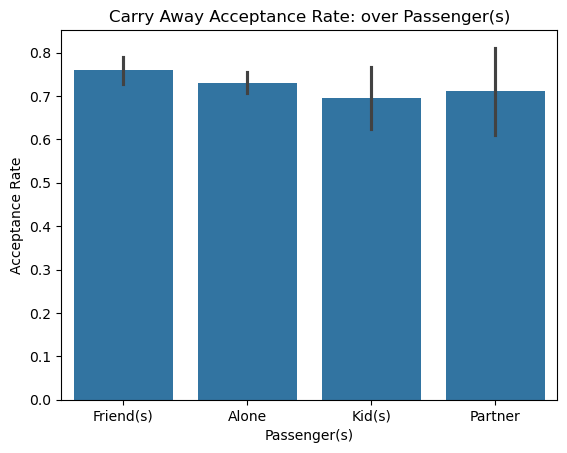

In [92]:
sns.barplot(df_Carryout_filtered,x='passanger',y='Y')

plt.title('Carry Away Acceptance Rate: over Passenger(s)')
plt.xlabel('Passenger(s)')
plt.ylabel('Acceptance Rate')
Carry_accpt_passenger = df_Carryout_filtered.query('passanger == "Kid(s)"')['Y'].mean()
print(Carry_accpt_passenger)

Text(0, 0.5, 'Acceptance Rate')

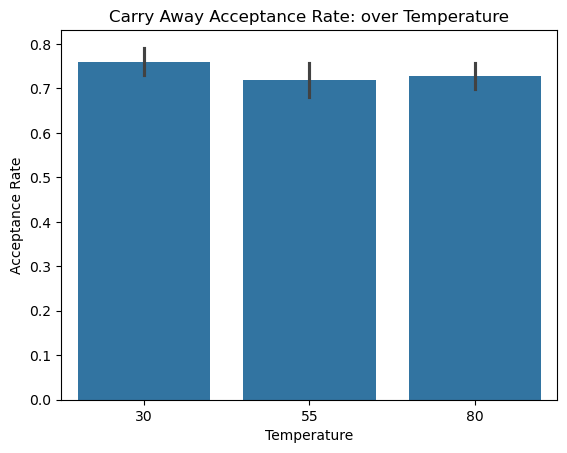

In [93]:
sns.barplot(df_Carryout_filtered,x='temperature',y='Y')
plt.title('Carry Away Acceptance Rate: over Temperature')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')

0.6086956521739131


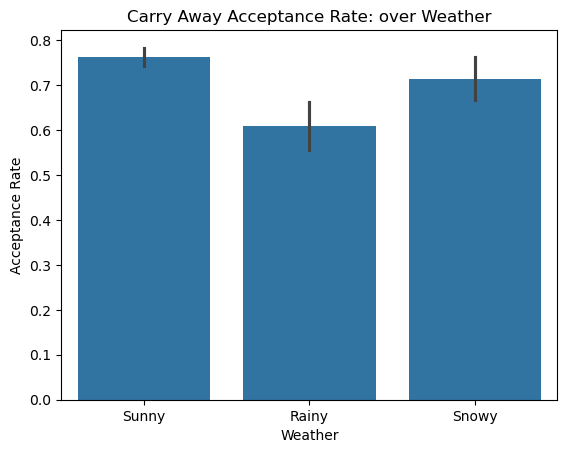

In [94]:
sns.barplot(df_Carryout_filtered,x='weather',y='Y')
plt.title('Carry Away Acceptance Rate: over Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
Carry_accpt_rainy = df_Carryout_filtered.query('weather == "Rainy"')['Y'].mean()
print(Carry_accpt_rainy)

In [95]:
#destination
destination_list = data_clean['destination'].unique()
Carry_accpt_destination_all = df_Carryout_filtered['Y'].mean()
Carry_accpt_destination = []
for value in destination_list:
    temp = df_Carryout_filtered[df_Carryout_filtered['destination'] == value]['Y'].mean().round(2)
    Carry_accpt_destination.append(temp)

print(Carry_accpt_destination)
print(destination_list)
print(Carry_accpt_destination_all)


[0.76, 0.79, 0.65]
['No Urgent Place' 'Home' 'Work']
0.7357814599193909


In [96]:
#has_children
destination_list = data_clean['has_children'].unique()
Carry_accpt_destination_all = df_Carryout_filtered['Y'].mean()
Carry_accpt_destination = []
for value in destination_list:
    temp = df_Carryout_filtered[df_Carryout_filtered['has_children'] == value]['Y'].mean().round(2)
    Carry_accpt_destination.append(temp)

print(Carry_accpt_destination)
print(destination_list)
print(Carry_accpt_destination_all)


[0.73, 0.74]
[0 1]
0.7357814599193909


### Problem Statement #3: What inference can be drawn from the Corelation Matrix
- Temperatue has very low positive corelation with coupon acceptance (0.055): 
- Having children has very low negative corelation with coupon acceptance (-0.048)
- toCoupon_GEQ5min: No corelation
- toCoupon_GEQ15min: low negative corelation (-0.083)
- toCoupon_GEQ25min: Moderate negative corelation (-0.1)
- direction_same: low positive corelation (0.0147)
- direction_opposite: low negative corelation (-0.0147); same magnitude as direction_same but opposite correlation.
- If the direction is opposite to the drive direcion, the driver will not accept coupon

In [98]:
numeric_df = data_clean.select_dtypes(include=['number'])
corr_mat = numeric_df.corr()
corr_mat
#numeric_df.head()

temperature  has_children  toCoupon_GEQ5min  \
temperature           1.000000     -0.019496               NaN   
has_children         -0.019496      1.000000               NaN   
toCoupon_GEQ5min           NaN           NaN               NaN   
toCoupon_GEQ15min    -0.157572      0.081004               NaN   
toCoupon_GEQ25min    -0.226657     -0.010965               NaN   
direction_same        0.098386     -0.033815               NaN   
direction_opp        -0.098386      0.033815               NaN   
Y                     0.054652     -0.048010               NaN   

                   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
temperature                -0.157572          -0.226657        0.098386   
has_children                0.081004          -0.010965       -0.033815   
toCoupon_GEQ5min                 NaN                NaN             NaN   
toCoupon_GEQ15min           1.000000           0.321834       -0.304470   
toCoupon_GEQ25min           0.321834           1.000000       -0.190361   
direction_same             -0.304470          -0.190361        1.000000   
direction_opp               0.304470           0.190361       -1.000000   
Y                          -0.082860          -0.105185        0.014748   

                   direction_opp         Y  
temperature            -0.098386  0.054652  
has_children            0.033815 -0.048010  
toCoupon_GEQ5min             NaN       NaN  
toCoupon_GEQ15min       0.304470 -0.082860  
toCoupon_GEQ25min       0.190361 -0.105185  
direction_same         -1.000000  0.014748  
direction_opp           1.000000 -0.014748  
Y                      -0.014748  1.000000

[0.5372398685651698, 0.5977961432506887, 0.5375457875457875]
[55 80 30]


Text(0, 0.5, 'Acceptance Rate')

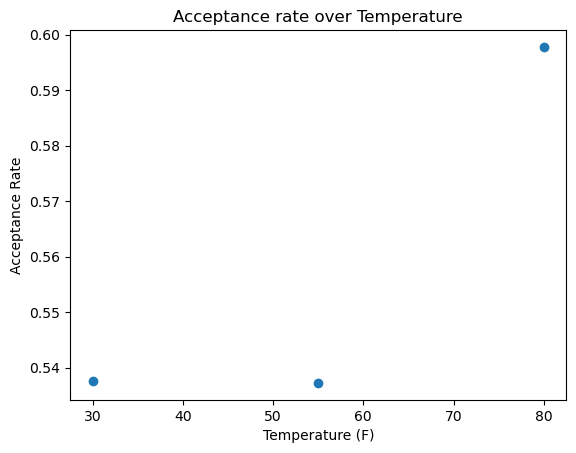

In [99]:
#unique temperature
temp_unique = data_clean['temperature'].unique()
acceptance_rate_temp = []
for value in temp_unique:
    filtered_df = data_clean[data_clean['temperature']==value]
    acceptance_rate = filtered_df['Y'].mean()
    acceptance_rate_temp.append(acceptance_rate)

plt.scatter(temp_unique,acceptance_rate_temp)
print(acceptance_rate_temp)
print(temp_unique)
plt.title('Acceptance rate over Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Acceptance Rate')